<a href="https://colab.research.google.com/github/GaninDevops411/exam_practice_task/blob/main/Lab_1_(w_wine_dataset).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Классификация данных с использованием PyTorch
Задание:
1.   Загрузить датасет (например, Iris или другой)
2.   Провести предобработку данных:
    *   Нормализация (MinMaxScaler, StandardScaler).
    *   Разделение на train/test.
3. Обучить модели:
    *   SVM (Support Vector Machine)
    *   Random Forest
4. Оценить качество моделей:
    * Accuracy, F1-score, precision, recall.
    * Построить confusion matrix.

Порядок выполнения:
1. Импорт библиотек (sklearn, pandas, matplotlib).
2. Загрузка и разведочный анализ данных.
3. Нормализация признаков.
4. Обучение моделей.
5. Оценка метрик и визуализация confusion matrix.

# My example

In [ ]:
#1. Importing libraries/Импорт библиотек
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

In [ ]:
# 2. Downloading and exploratory data analysis/Загрузка и разведочный анализ данных
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

print(f"Features: {feature_names}")
print(f"Classes: {target_names}")
print(f"Dataset shape: {X.shape}")

# Class distribution/Распределение по классам
unique, counts = np.unique(y, return_counts=True)
print(f"Class distribution: {dict(zip(target_names, counts))}")

Features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Classes: ['setosa' 'versicolor' 'virginica']
Dataset shape: (150, 4)
Class distribution: {np.str_('setosa'): np.int64(50), np.str_('versicolor'): np.int64(50), np.str_('virginica'): np.int64(50)}


In [ ]:
# 3. Normalization/Нормализация
# MinMaxScaler, StandardScaler
scaler_minmax = MinMaxScaler()
X_minmax = scaler_minmax.fit_transform(X)

scaler_standard = StandardScaler()
X_standard = scaler_standard.fit_transform(X)

In [ ]:
#----- We will use data normalized using StandardScaler for training!-----
# -----Для обучения будем использовать данные нормализованные с помощью StandardScaler!-----

# 4. Splitting training and validation data train/test (80/20) / Разделение на обучение и валидацию train/test (80/20)
X_train, X_test, y_train, y_test = train_test_split(X_standard, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
# 5. Model trainig / Обучение модели
# SVM
svm_clf = SVC(kernel='rbf', random_state=42)
svm_clf.fit(X_train, y_train)

# Random Forest
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

In [ ]:
# 6. Model quality assessment / Оценка качества модели
def print_metrics(y_true, y_pred, model_name):
    acc = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred, average='weighted')
    prec = precision_score(y_true, y_pred, average='weighted')
    rec = recall_score(y_true, y_pred, average='weighted')
    print(f"--- {model_name} ---")
    print(f"Accuracy: {acc:.4f}")
    print(f"F1-score: {f1:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall: {rec:.4f}")
    print(classification_report(y_true, y_pred, target_names=target_names))

# Predictions / Прогнозируемые значения
y_pred_svm = svm_clf.predict(X_test)
y_pred_rf = rf_clf.predict(X_test)

print_metrics(y_test, y_pred_svm, "SVM")
print_metrics(y_test, y_pred_rf, "Random Forest")

--- SVM ---
Accuracy: 0.9667
F1-score: 0.9666
Precision: 0.9697
Recall: 0.9667
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.90      0.95        10
   virginica       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30

--- Random Forest ---
Accuracy: 0.9333
F1-score: 0.9333
Precision: 0.9333
Recall: 0.9333
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.90      0.90      0.90        10
   virginica       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



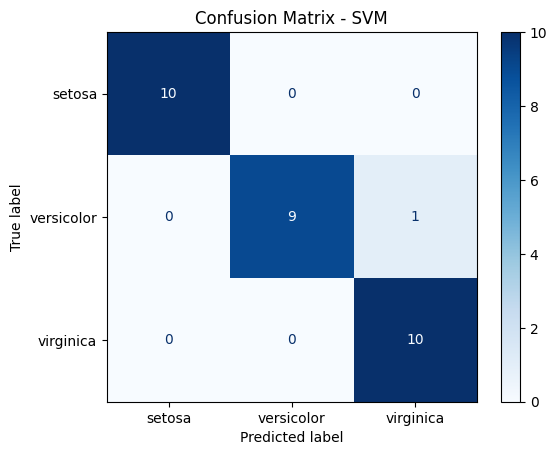

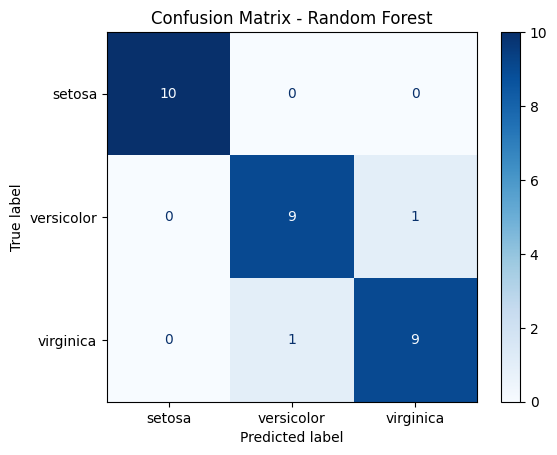

In [ ]:
# 7. Visualization of the confusion matrix / Визуализация confusion matrix
def plot_conf_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()

plot_conf_matrix(y_test, y_pred_svm, "SVM")
plot_conf_matrix(y_test, y_pred_rf, "Random Forest")

# ALTERNATIVE VER of the example from D.M. Elkin (Wine dataset)


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

In [ ]:
# Configuring Visualization
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (8, 4)

In [ ]:
# ---- 1. Loading and preanalysing the data ---
wine = load_wine()# Loading Wine dataset
X = wine.data # Extract the feature data
y = wine.target  # Extract the target data

df = pd.DataFrame(X, columns=wine.feature_names) # Defining 'wine'
df['Cultivar'] = y
df['Classes'] = df['Cultivar'].map({i: wine.target_names[i] for i in range(len(wine.target_names))})

# Printing information
print("Dataset size:", df.shape) #tuple of lines and columns
print("\n First 10 lines:")
print(df.head(10))

print("\n Summary table:")
print(df.describe())

print("\n Number of instances of each class:")
print(df['Classes'].value_counts())

Dataset size: (178, 15)

 First 10 lines:
   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   
5    14.20        1.76  2.45               15.2      112.0           3.27   
6    14.39        1.87  2.45               14.6       96.0           2.50   
7    14.06        2.15  2.61               17.6      121.0           2.60   
8    14.83        1.64  2.17               14.0       97.0           2.80   
9    13.86        1.35  2.27               16.0       98.0           2.98   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  

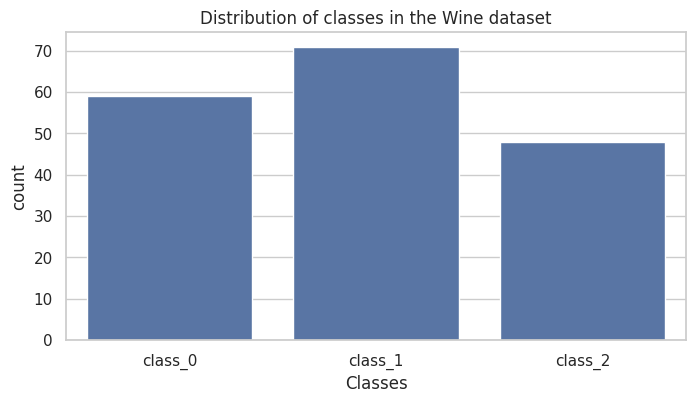

In [ ]:
# Visualization of class distribution
sns.countplot(data=df, x='Classes')
plt.title('Distribution of classes in the Wine dataset')
plt.show()

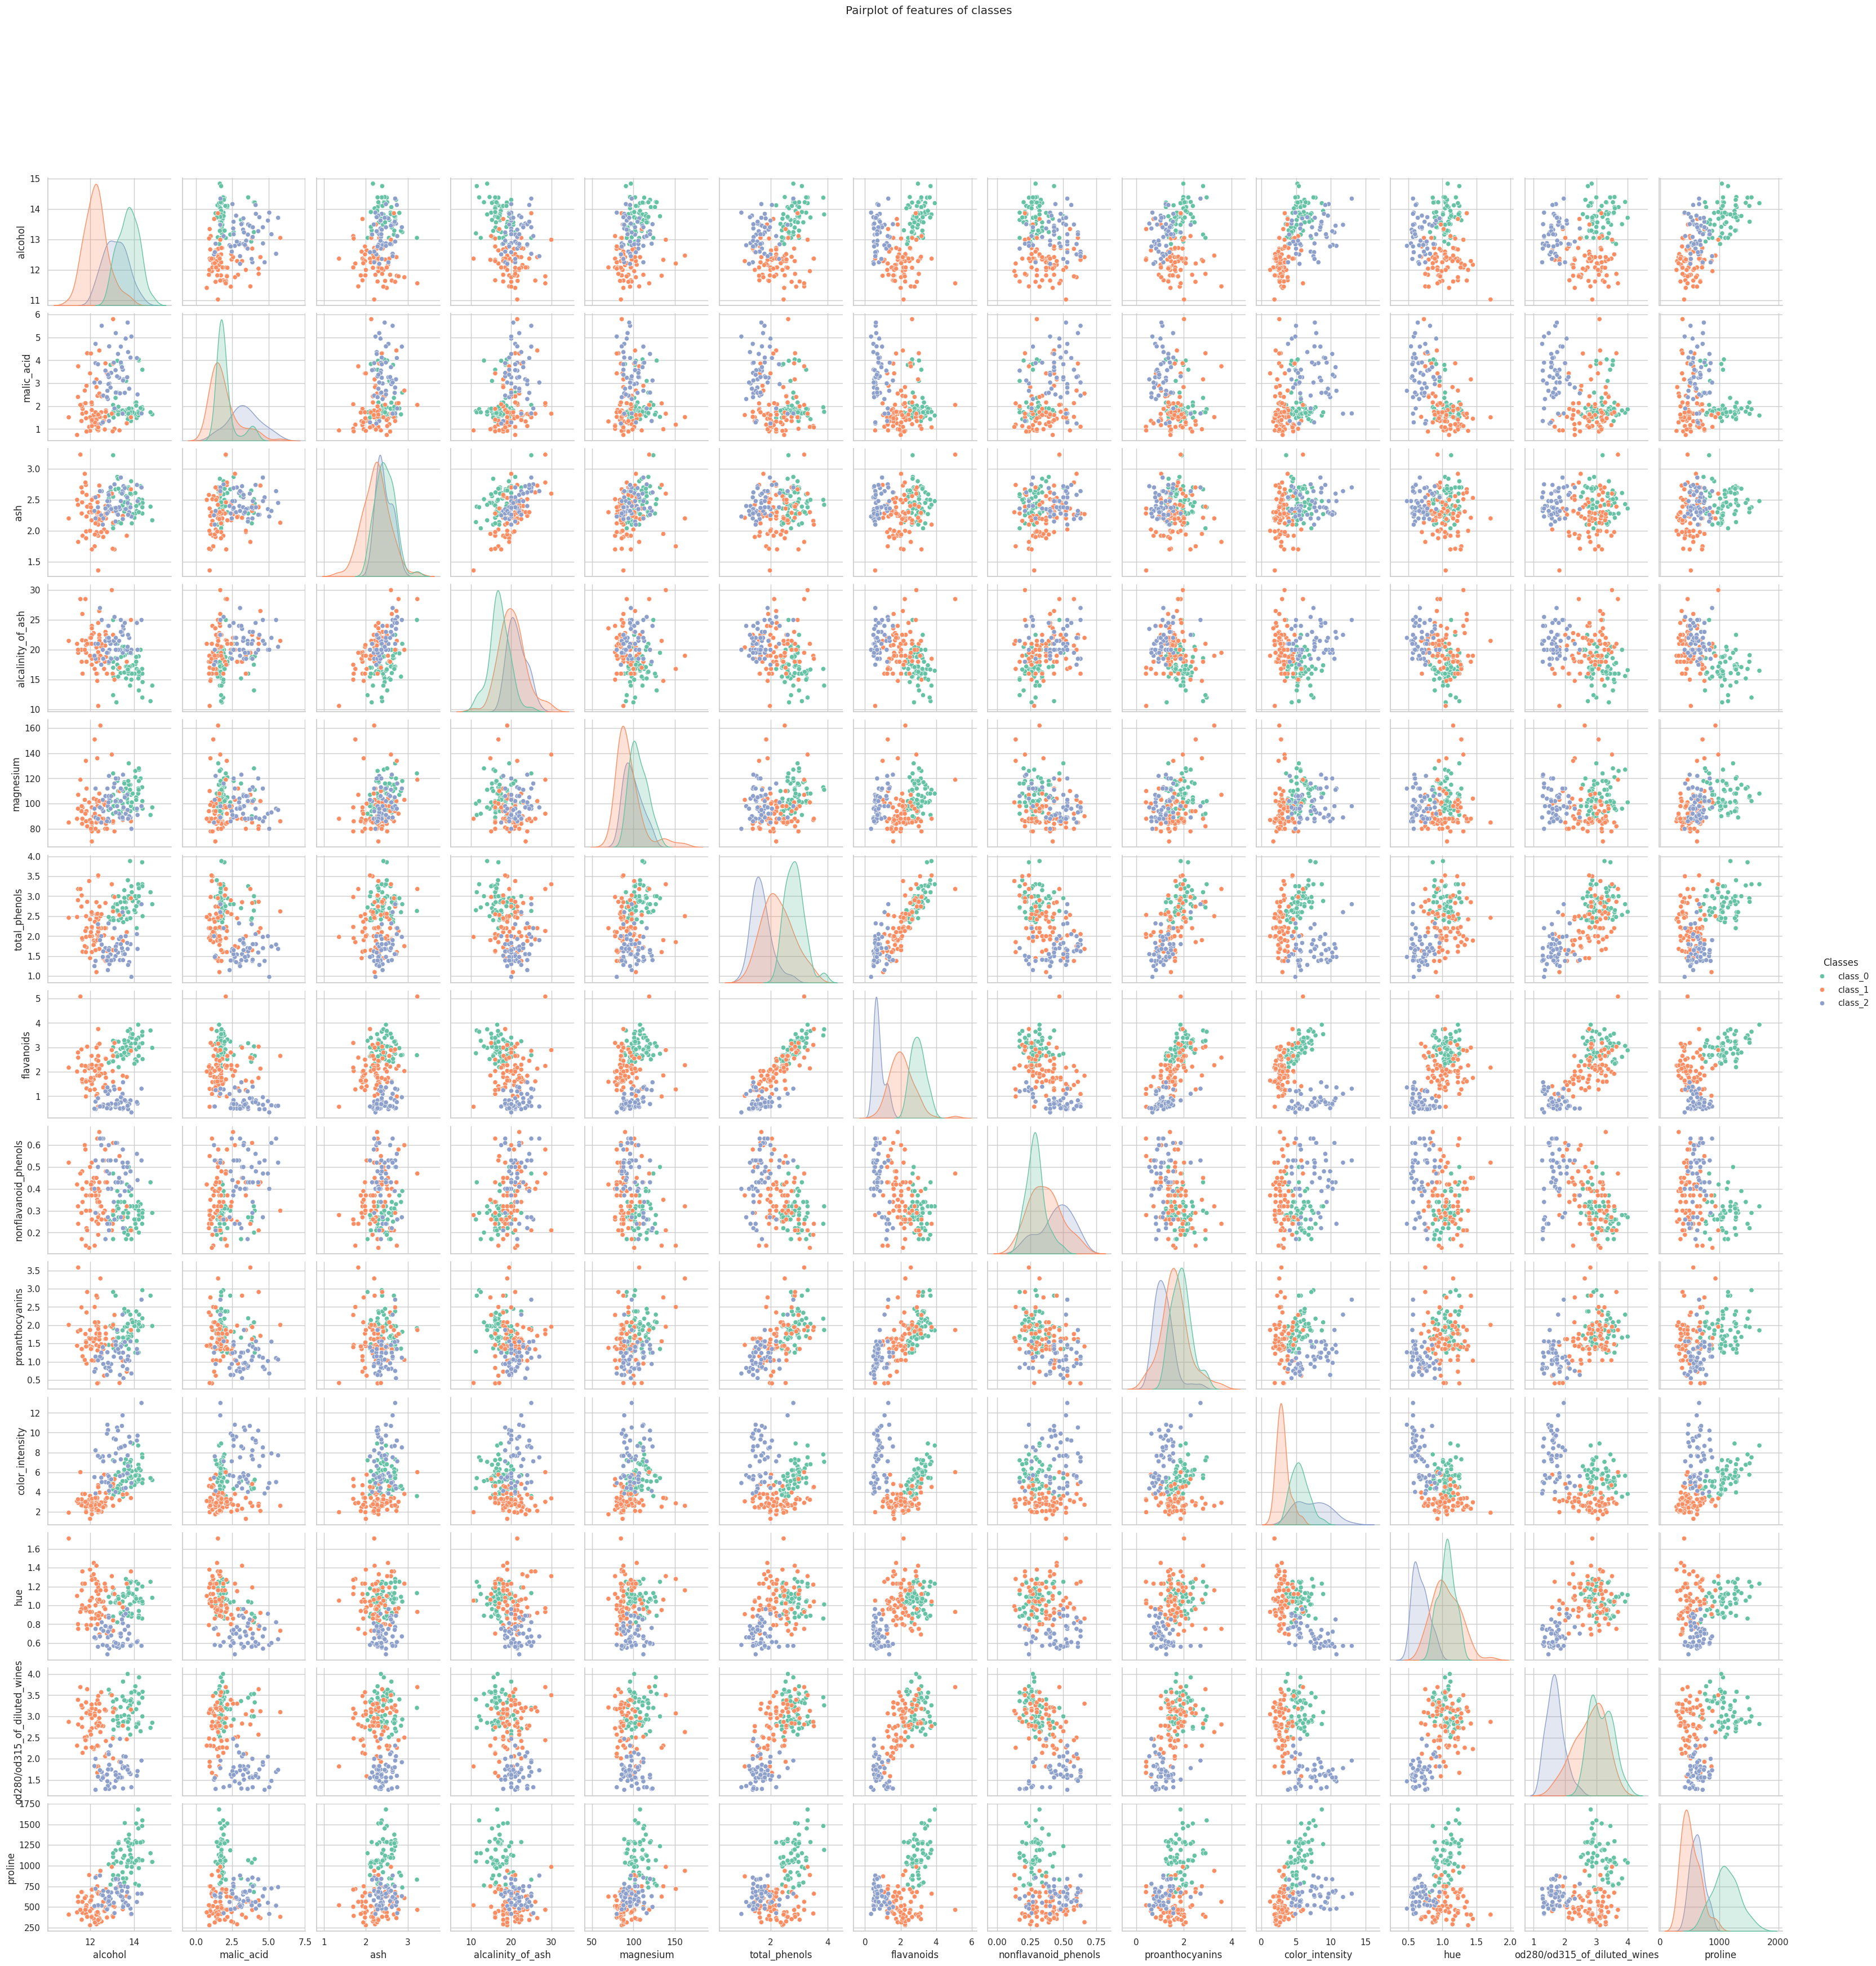

In [ ]:
# Visualization of the distribution of features (ONLY FOR SMALL DATASETS)
sns.pairplot(df.drop('Cultivar', axis=1), hue='Classes', palette='Set2') #dropping 'target' column (axis = 1); hue - each variable inside the class is assigned a colour; categorical palette "set2"
plt.suptitle('Pairplot of features of classes', y=1.08) # y - (height)>1, for better spacing
plt.show()

In [ ]:
# --- 3. Data preprocessing ---
# Splitting into features and the target variable
X = df.drop(['Cultivar', 'Classes'], axis=1)
y = df['Cultivar']

# Splitting into training (80%) and test sets (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y) #random_state = 42 for recreational purpose, remove after

# Normalization: StandardScaler
scaler_std = StandardScaler()
X_train_std = scaler_std.fit_transform(X_train)
X_test_std = scaler_std.transform(X_test)

# Normalization: MinMaxScaler
scaler_minmax = MinMaxScaler()
X_train_minmax = scaler_minmax.fit_transform(X_train)
X_test_minmax = scaler_minmax.transform(X_test)

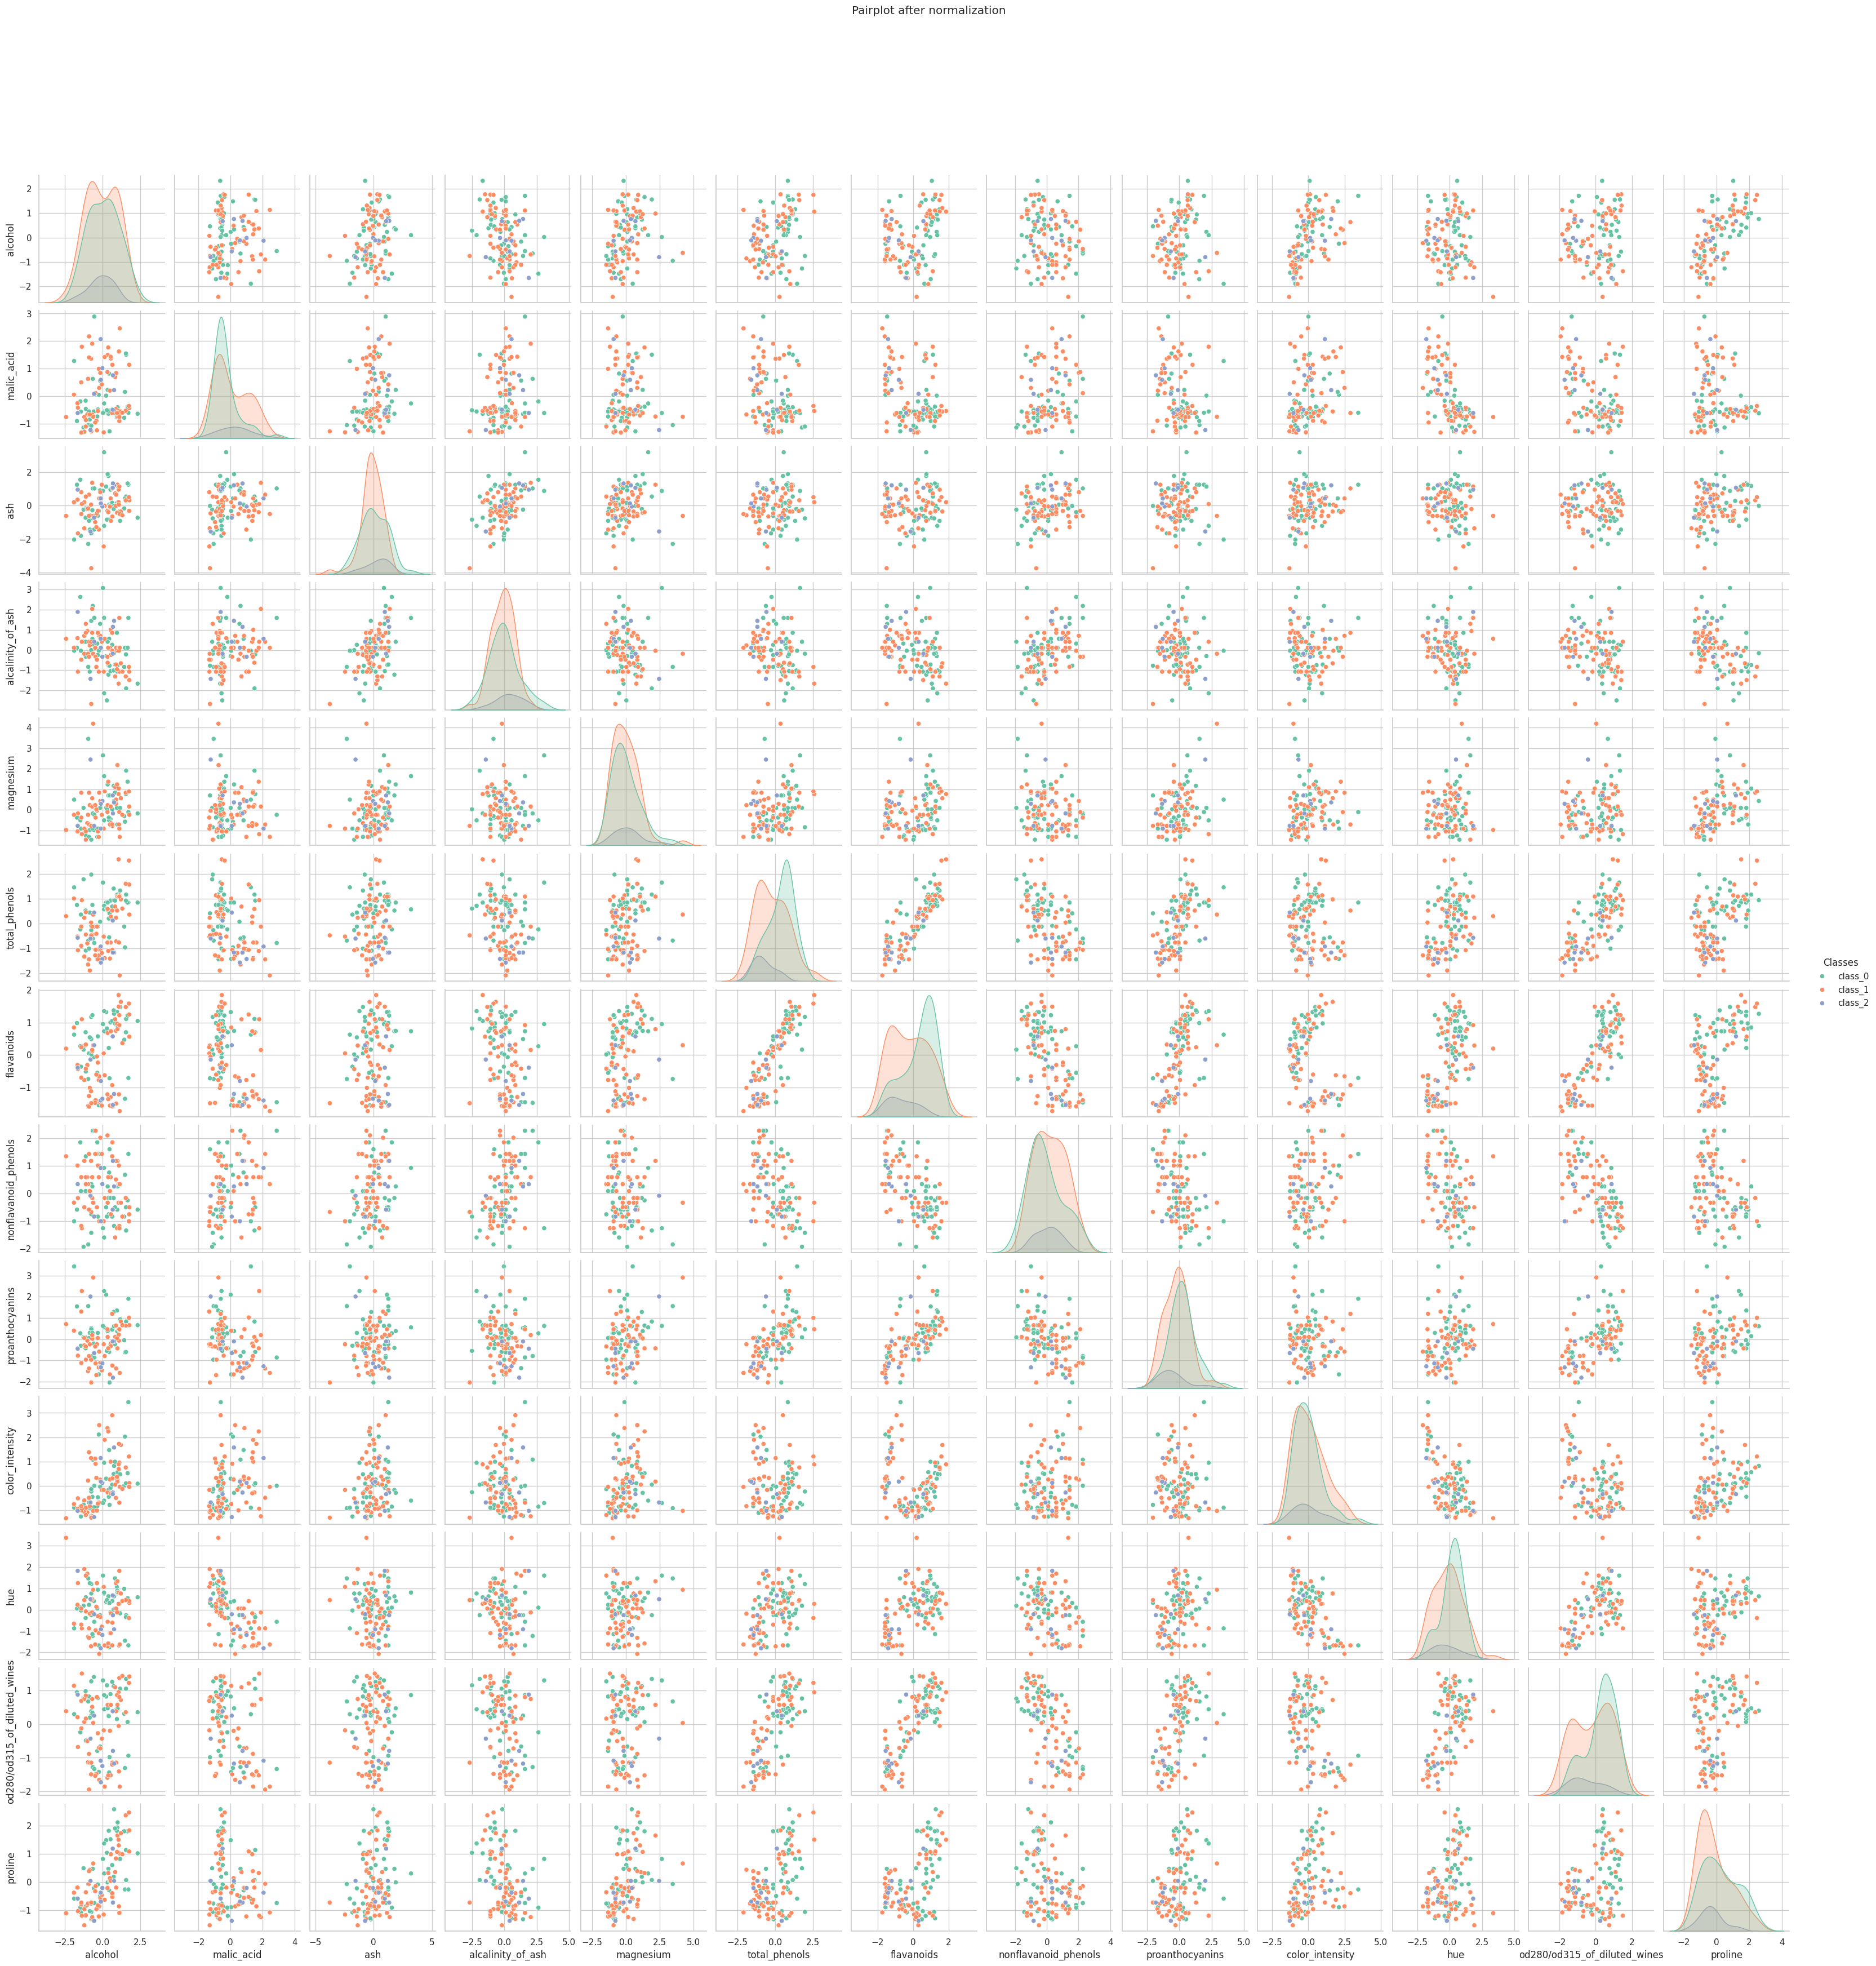

In [ ]:
df_norm = pd.DataFrame(X_train_std, columns=X_train.columns)
df_norm['Classes'] = y_train.map({0: 'class_0', 1: 'class_1', 2: 'class_2'})

# Pairplot after normalization
sns.pairplot(df_norm, hue='Classes', palette='Set2')
plt.suptitle('Pairplot after normalization', y=1.08)
plt.show()

In [ ]:
# --- 4. Training models ---
# Model 1: SVM (normalization StandardScaler)
svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train_std, y_train)
y_pred_svm_ss = svm_model.predict(X_test_std)

# Model 2: SVM (normalization MinMax)
svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train_minmax, y_train)
y_pred_svm_mm = svm_model.predict(X_test_minmax)

# Model 3: Random Forest (no normalization)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

In [ ]:
# --- 5. Model quality assessment ---
def evaluate_model(y_true, y_pred, model_name):
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, average='weighted')
    rec = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')

    print(f"\n--- {model_name} ---")
    print(f"Accuracy:  {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall:    {rec:.4f}")
    print(f"F1-score:  {f1:.4f}")

    print("\nClassification Report:")
    print(classification_report(y_true, y_pred, target_names=wine.target_names))

    return acc, prec, rec, f1

# Evaluating SVM
metrics_svm_ss = evaluate_model(y_test, y_pred_svm_ss, "SVM_SS")
metrics_svm_mm = evaluate_model(y_test, y_pred_svm_mm, "SVM_MM")

# Evaluating Random Forest
metrics_rf = evaluate_model(y_test, y_pred_rf, "Random Forest")


--- SVM_SS ---
Accuracy:  0.9722
Precision: 0.9741
Recall:    0.9722
F1-score:  0.9720

Classification Report:
              precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        12
     class_1       0.93      1.00      0.97        14
     class_2       1.00      0.90      0.95        10

    accuracy                           0.97        36
   macro avg       0.98      0.97      0.97        36
weighted avg       0.97      0.97      0.97        36


--- SVM_MM ---
Accuracy:  1.0000
Precision: 1.0000
Recall:    1.0000
F1-score:  1.0000

Classification Report:
              precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        12
     class_1       1.00      1.00      1.00        14
     class_2       1.00      1.00      1.00        10

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36


--- Random Fo

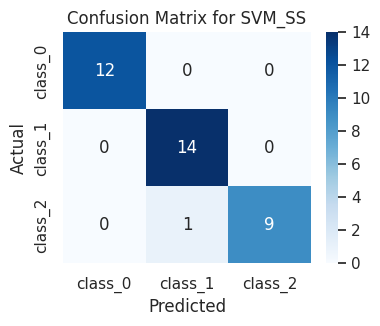

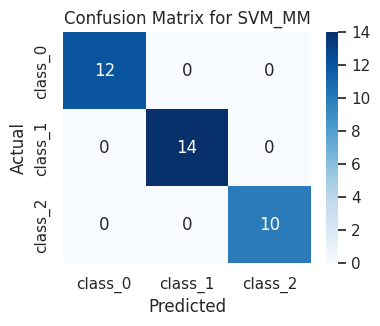

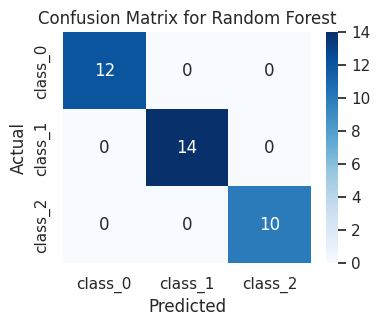

In [ ]:
# --- Visualizing confusion matrix ---
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=wine.target_names, yticklabels=wine.target_names)
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Building the confusion matrix
plot_confusion_matrix(y_test, y_pred_svm_ss, "SVM_SS")
plot_confusion_matrix(y_test, y_pred_svm_mm, "SVM_MM")
plot_confusion_matrix(y_test, y_pred_rf, "Random Forest")


 Comparison of models
           Model  Accuracy  Precision  Recall  F1-score
0         SVM_SS    0.9722     0.9741  0.9722     0.972
1         SVM_MM    1.0000     1.0000  1.0000     1.000
2  Random Forest    1.0000     1.0000  1.0000     1.000


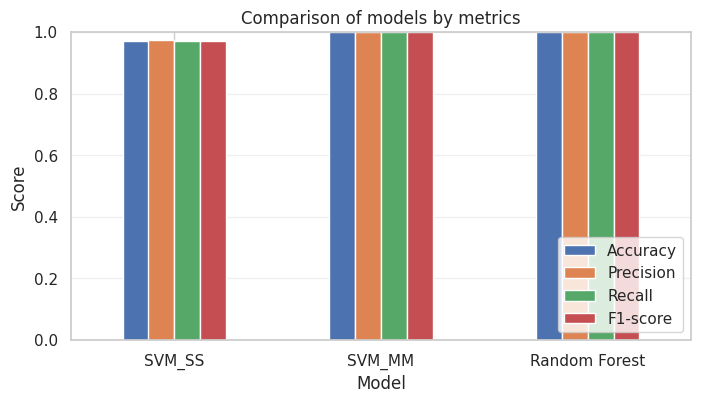

In [ ]:
# --- Comparison of metrics in the table reperesentation ---
metrics_df = pd.DataFrame({
    'Model': ['SVM_SS','SVM_MM', 'Random Forest'],
    'Accuracy': [metrics_svm_ss[0],metrics_svm_mm[0], metrics_rf[0]],
    'Precision': [metrics_svm_ss[1], metrics_svm_mm[1], metrics_rf[1]],
    'Recall': [metrics_svm_ss[2],metrics_svm_mm[2], metrics_rf[2]],
    'F1-score': [metrics_svm_ss[3], metrics_svm_mm[3], metrics_rf[3]]
})

print("\n Comparison of models")
print(metrics_df.round(4)) # number of decimal places = 4

# Visualization of metrics
metrics_df.set_index('Model').plot(kind='bar', rot = 0, title='Comparison of models by metrics')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.legend(loc='lower right')
plt.grid(axis='y', alpha=0.3)
plt.show()